In [2]:
import torch
from torch.nn import functional as F
from makemore_helper import *
import matplotlib.pyplot as plt
%matplotlib inline
import random


Paper : https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [3]:
words = get_names_list()
random.seed(42)
random.shuffle(words)

In [4]:
sorted_chars = sorted(list(set(''.join(words))))
num_classes = len(sorted_chars) + 1 # one extra for '.'

In [5]:
block_size=3
xs, ys = get_ngram_dataset(words=words,block_size=block_size)

In [6]:
xs.shape,ys.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [7]:
#visualising
example_ct = 32
for xi, yi in zip(xs[:example_ct], ys[:example_ct]):
    chsi = ''.join([default_itos[ix.item()] for ix in xi])
    chy = default_itos[yi.item()]
    print(f'{chsi} --- {chy}')


... --- y
..y --- u
.yu --- h
yuh --- e
uhe --- n
hen --- g
eng --- .
... --- d
..d --- i
.di --- o
dio --- n
ion --- d
ond --- r
ndr --- e
dre --- .
... --- x
..x --- a
.xa --- v
xav --- i
avi --- e
vie --- n
ien --- .
... --- j
..j --- o
.jo --- r
jor --- i
ori --- .
... --- j
..j --- u
.ju --- a
jua --- n
uan --- l


In [8]:
xs_train, ys_train, xs_val, ys_val, xs_test, ys_test = train_val_test_split(xs, ys, 80, 10)
xs_train.shape, ys_train.shape, xs_val.shape, ys_val.shape, xs_test.shape, ys_test.shape

(torch.Size([182516, 3]),
 torch.Size([182516]),
 torch.Size([22815, 3]),
 torch.Size([22815]),
 torch.Size([22815, 3]),
 torch.Size([22815]))

In [9]:
embeding_size = 2

In [10]:
C = torch.randn((num_classes, embeding_size))

In [11]:
C[5]

tensor([-0.5795, -0.5210])

In [12]:
F.one_hot(torch.tensor(5), num_classes=num_classes).float() @ C

tensor([-0.5795, -0.5210])

In [13]:
emb = C[xs_train]
emb.shape

torch.Size([182516, 3, 2])

In [14]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [15]:
h = torch.tanh(emb.view(-1 , block_size *embeding_size) @ W1 + b1)

In [16]:
h.shape

torch.Size([182516, 100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2
logits

tensor([[ -3.8904,  -2.5813,  -2.1204,  ...,   7.9275,  -3.3335,   4.7966],
        [ -0.9810,   1.4103,   2.2497,  ...,   6.7632,  -3.7616,   8.9765],
        [-18.2136,   6.4029, -11.3524,  ...,  12.4145,   1.3037,   1.8356],
        ...,
        [  2.5825,  -7.8676,   0.5554,  ...,  12.0313,   4.4196,   3.3984],
        [ -3.8904,  -2.5813,  -2.1204,  ...,   7.9275,  -3.3335,   4.7966],
        [ -7.7391,   2.7493,  -4.8977,  ...,   6.7410,  -1.0092,   4.9083]])

In [19]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
counts

tensor([[2.0436e-02, 7.5676e-02, 1.1999e-01,  ..., 2.7725e+03, 3.5666e-02,
         1.2109e+02],
        [3.7495e-01, 4.0971e+00, 9.4848e+00,  ..., 8.6543e+02, 2.3246e-02,
         7.9149e+03],
        [1.2300e-08, 6.0360e+02, 1.1741e-05,  ..., 2.4636e+05, 3.6830e+00,
         6.2688e+00],
        ...,
        [1.3230e+01, 3.8295e-04, 1.7426e+00,  ..., 1.6794e+05, 8.3066e+01,
         2.9916e+01],
        [2.0436e-02, 7.5676e-02, 1.1999e-01,  ..., 2.7725e+03, 3.5666e-02,
         1.2109e+02],
        [4.3545e-04, 1.5631e+01, 7.4635e-03,  ..., 8.4640e+02, 3.6451e-01,
         1.3540e+02]])

In [20]:
prob

tensor([[1.4870e-07, 5.5066e-07, 8.7309e-07,  ..., 2.0174e-02, 2.5953e-07,
         8.8115e-04],
        [2.2488e-05, 2.4572e-04, 5.6885e-04,  ..., 5.1904e-02, 1.3942e-06,
         4.7469e-01],
        [3.2305e-14, 1.5853e-03, 3.0835e-11,  ..., 6.4701e-01, 9.6728e-06,
         1.6464e-05],
        ...,
        [1.8024e-07, 5.2173e-12, 2.3741e-08,  ..., 2.2880e-03, 1.1317e-06,
         4.0757e-07],
        [1.4870e-07, 5.5066e-07, 8.7309e-07,  ..., 2.0174e-02, 2.5953e-07,
         8.8115e-04],
        [3.3086e-09, 1.1877e-04, 5.6709e-08,  ..., 6.4311e-03, 2.7696e-06,
         1.0288e-03]])

In [21]:
ypred = prob[torch.arange(prob.shape[0]), ys_train]
ypred

tensor([2.5953e-07, 1.3233e-01, 9.0349e-10,  ..., 1.8024e-07, 6.8617e-03,
        3.0115e-05])

In [22]:
loss = -ypred.log().mean()
loss

tensor(14.4943)

In [33]:
# Everything above combined
g = torch.Generator().manual_seed(2147483647)

h_n_ct = 300 # hidden layer neuron count
embeding_size = 10

C = torch.randn((num_classes, embeding_size), generator=g)
W1 = torch.randn((block_size*embeding_size, h_n_ct), generator=g)
b1 = torch.randn(h_n_ct, generator=g)
W2 = torch.randn((h_n_ct, num_classes), generator=g)
b2 = torch.randn(num_classes, generator=g)
parameters = [C, W1, b1, W2, b2]

In [34]:
sum(p.nelement() for p in parameters) # total parameteres

17697

In [35]:
for p in parameters:
    p.requires_grad = True

In [36]:
batch_size = 32
stepi = []
lossi = []
steps = 0

In [37]:
for i in range(200000):
    #mini batch
    ix = torch.randint(0, xs_train.shape[0], (batch_size,))
    
    # forward pass
    emb = C[xs_train[ix]]
    h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
    logits = h @ W2 + b2
    # logits = logits - logits.max()
    # counts = logits.exp() 
    # prob = counts / counts.sum(1, keepdim=True)
    # ypred = prob[torch.arange(prob.shape[0]), ys_train]
    # loss = ypred.log().mean()
    loss = F.cross_entropy(logits, ys_train[ix])
    stepi.append(steps)
    lossi.append(loss.item())
    steps += 1
    if i % 10000 == 0:
        print(f'{i=}, {loss.item()=}')
    # backward_pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
loss.item()

i=0, loss.item()=33.344478607177734
i=10000, loss.item()=2.765263795852661
i=20000, loss.item()=2.4637904167175293
i=30000, loss.item()=2.4422948360443115
i=40000, loss.item()=2.7572455406188965
i=50000, loss.item()=3.0338521003723145
i=60000, loss.item()=2.217768907546997
i=70000, loss.item()=2.549940586090088
i=80000, loss.item()=2.3652284145355225
i=90000, loss.item()=3.3063836097717285
i=100000, loss.item()=1.9008978605270386
i=110000, loss.item()=2.0022284984588623
i=120000, loss.item()=1.7640299797058105
i=130000, loss.item()=2.5620243549346924
i=140000, loss.item()=2.573866844177246
i=150000, loss.item()=1.8427720069885254
i=160000, loss.item()=2.580303907394409
i=170000, loss.item()=2.442990303039551
i=180000, loss.item()=1.7931668758392334
i=190000, loss.item()=2.0091090202331543


2.293257713317871

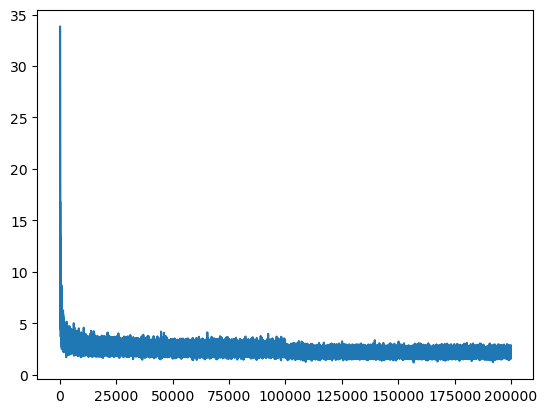

In [38]:
plt.plot(stepi, lossi)

In [39]:
emb = C[xs_val]
h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ys_val)
loss

tensor(2.1825, grad_fn=<NllLossBackward0>)

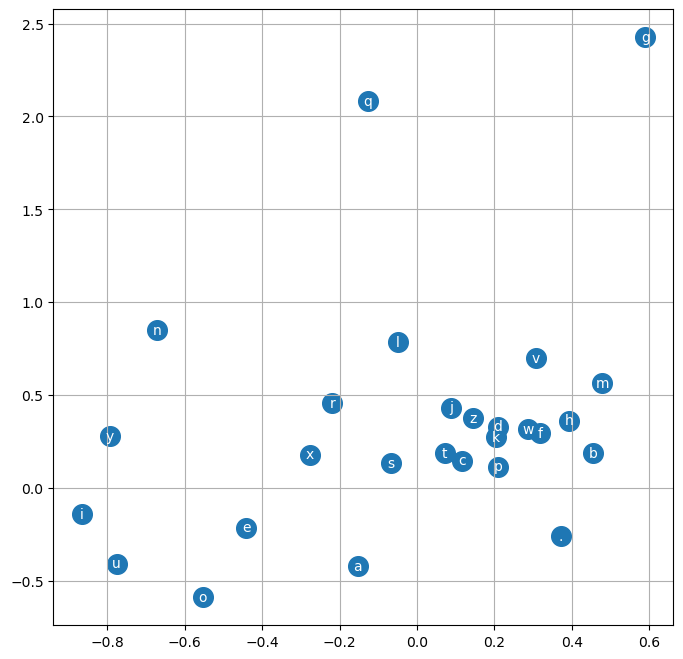

In [30]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), default_itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [40]:
# Test set
emb = C[xs_test]
h = torch.tanh(emb.view(-1 , block_size*embeding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, ys_test)
loss

tensor(2.1789, grad_fn=<NllLossBackward0>)

In [56]:
#predictions

g = torch.Generator().manual_seed(2147483647+11)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor(context)]    
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        prob = F.softmax(logits, dim=1)
#         prob = torch.randn(27).abs() // can uncoment this to show untrained output
        ix = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
        out.append(default_itos[ix])
        context = context[1:] + [ix]
        if ix == 0:
            break
    print(''.join(out))

jamelanthor.
imanderren.
arley.
cingsarde.
dianiston.
izabe.
jose.
dambryleieayi.
hareklabrogsisbeyer.
axua.
praponni.
jevanoan.
julia.
sashrosia.
naiden.
aibellandilkayanny.
jon.
emaedy.
shohe.
dria.
